<a href="https://colab.research.google.com/github/nmningmei/unconfeats/blob/main/HDDM_behavioral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pip
!pip cache purge

     |████████████████████████████████| 2.1 MB 8.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Files removed: 2


In [ ]:
#!pip uninstall numpy
!pip install numpy==1.19.3
!pip install -U mkl
!pip install pymc
!pip install kabuki
!pip install hddm==0.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 66.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.0/256.0 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 77.8 MB/s eta 0:00:00
  Attempting uninstall: mkl
    Found existing installatio

In [ ]:
import hddm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


<img src="https://hddm.readthedocs.io/en/latest/_images/DDM.svg" width="900" height="600">
[paper](https://m.seehuhn.de/papers/VRV04.pdf)

## Drift rate

The diffusion model assumes that binary decision processes are driven by systematic and random influences.The systematic influences are called the drift rate. They “drive” the process continuously in one direction, while the random influences add an erratic fluctuation to this constant path. The process is terminated immediately when one of two thresholds is reached. In a psychological application, this means that the decision process is finished and the response system is being activated, which will initiate the corresponding response (e.g., a keypress). **In short, it shows how fast a response is generated**

# Threshold

How discriminative between the choices (binary choices). This shows how separatble between distributions of the signal and the noise.

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1MKErVp_Uh8YoEN1VL_J7H89NWK9Fstla'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('concat_df.csv')

In [ ]:
import re
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

sns.set_style('white')
sns.set_context('poster')

In [ ]:
df = pd.read_csv('concat_df.csv')
visible_map = {1:'unconscious',
               2:'glimpse',
               3:'conscious',
}

# model response RT as a function of the other parameteres

In [ ]:
data = df.copy()
data = data.dropna()
data['rt'] = data['response.rt_raw'].values.copy()
data['response'] = data['response.keys_raw'].values.copy() + 1
data['subj_idx'] = data['sub'].values.copy()
data.columns

Index(['sub', 'category', 'subcategory', 'label', 'correctAns_raw',
       'response.corr_raw', 'response.keys_raw', 'response.rt_raw',
       'visible.keys_raw', 'visible.rt_raw', 'probe_Frames_raw', 'rt',
       'response', 'subj_idx'],
      dtype='object')

In [ ]:
data

,sub,category,subcategory,label,correctAns_raw,response.corr_raw,response.keys_raw,response.rt_raw,visible.keys_raw,visible.rt_raw,probe_Frames_raw,rt,response,subj_idx
0,sub-01,Nonliving_Things,Furniture,wardrobe,1.0,1.0,1,0.460185,3,0.290316,3,0.460185,2,sub-01
1,sub-01,Living_Things,Birds,hen,2.0,1.0,2,0.630302,2,0.920323,4,0.630302,3,sub-01
2,sub-01,Nonliving_Things,Vehicles,van,2.0,1.0,2,0.440285,1,0.250305,3,0.440285,3,sub-01
3,sub-01,Living_Things,Marine_creatures,killer-whale,1.0,1.0,1,0.510257,1,0.550338,3,0.510257,2,sub-01
4,sub-01,Living_Things,Birds,goose,1.0,1.0,1,0.590299,3,0.290312,5,0.590299,2,sub-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187,sub-07,Nonliving_Things,Tools,hammer,1.0,1.0,1,0.640366,1,0.500362,2,0.640366,2,sub-07
12188,sub-07,Nonliving_Things,Buildings,palace,2.0,0.0,1,0.650178,1,0.140301,1,0.650178,2,sub-07
12189,sub-07,Nonliving_Things,Vehicles,motorbike,1.0,1.0,1,0.700363,3,0.990181,1,0.700363,2,sub-07
12190,sub-07,Living_Things,Marine_creatures,crab,1.0,1.0,1,0.610267,3,0.200305,1,0.610267,2,sub-07


In [ ]:
############################################
# Instantiate model object passing it our data (no need to call flip_errors() before passing it).
# This will tailor an individual hierarchical DDM around your dataset.
m = hddm.HDDM(data, 
              depends_on = {'v':['category','visible.keys_raw'],
                            'a':['category','visible.keys_raw']},
              is_group_model = True,
              bias = True, # include the bias term, so we will have {a,v,t,b} parameters
              )
# find a good starting point which helps with the convergence.
m.find_starting_values()
# start drawing 2000 samples and discarding 500 as burn-in
m.sample(2000, burn=500)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 738.1 sec

In [ ]:
stats = m.gen_stats()
trace = m.get_traces()

In [ ]:
[item for item in trace.columns]

['a(Living_Things.1)',
 'a(Living_Things.2)',
 'a(Living_Things.3)',
 'a(Nonliving_Things.1)',
 'a(Nonliving_Things.2)',
 'a(Nonliving_Things.3)',
 'a_std',
 'a_subj(Living_Things.1).sub-01',
 'a_subj(Living_Things.2).sub-01',
 'a_subj(Living_Things.3).sub-01',
 'a_subj(Living_Things.1).sub-02',
 'a_subj(Living_Things.2).sub-02',
 'a_subj(Living_Things.3).sub-02',
 'a_subj(Living_Things.1).sub-03',
 'a_subj(Living_Things.2).sub-03',
 'a_subj(Living_Things.3).sub-03',
 'a_subj(Living_Things.1).sub-04',
 'a_subj(Living_Things.2).sub-04',
 'a_subj(Living_Things.3).sub-04',
 'a_subj(Living_Things.1).sub-05',
 'a_subj(Living_Things.2).sub-05',
 'a_subj(Living_Things.3).sub-05',
 'a_subj(Living_Things.1).sub-06',
 'a_subj(Living_Things.2).sub-06',
 'a_subj(Living_Things.3).sub-06',
 'a_subj(Living_Things.1).sub-07',
 'a_subj(Living_Things.2).sub-07',
 'a_subj(Living_Things.3).sub-07',
 'a_subj(Nonliving_Things.1).sub-01',
 'a_subj(Nonliving_Things.2).sub-01',
 'a_subj(Nonliving_Things.3).sub

In [ ]:
def generate_df_plot(trace,formula = 'target~category*visibility',target = 'v'):
    df_columns = list(trace.columns)
    if formula == 'target~category*visibility':
        columns = [item for item in df_columns if (f'{target}(' in item) and ('iving_Things' in item)]
        df_plot = pd.melt(trace,id_vars = None,value_vars = columns,)
        df_plot['category'] = df_plot['variable'].apply(lambda x:x[2:].split('.')[0])
        df_plot['visibility'] = df_plot['variable'].apply(lambda x:int(x[-2])).map(visible_map)
    elif formula == 'target~category*visibility*sub':
        columns = [item for item in df_columns if (f'{target}_subj' in item) and ('iving_Things' in item)]
        df_plot = pd.melt(trace,id_vars = None,value_vars = columns,)
        df_plot['sub'] = df_plot['variable'].apply(lambda x:x.split('.')[-1])
        df_plot['category'] = df_plot['variable'].apply(lambda x:x.split('.')[0][7:].split('.')[0])
        df_plot['visibility'] = df_plot['variable'].apply(lambda x:int(x.split('.')[1][0])).map(visible_map)
    return df_plot

## drift rate as a function of different categories and visibility

In [ ]:
df_plot = generate_df_plot(trace,formula = "target~category*visibility",target = 'v')

[Text(0, 0.5, 'Drift rate'), Text(0.5, 0, 'Category')]

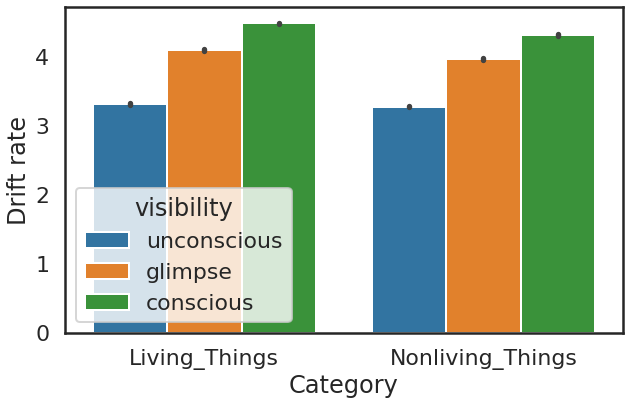

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(x = 'category',
                 y = 'value',
                 hue = 'visibility',
                 hue_order = ['unconscious','glimpse','conscious'],
                 data = df_plot,
                 ax = ax,
                 )
ax.set(xlabel = 'Category',ylabel = 'Drift rate')

## drift rate as a function of category,visibility and subjects

In [ ]:
df_plot = generate_df_plot(trace,formula = "target~category*visibility*sub",target = 'v')

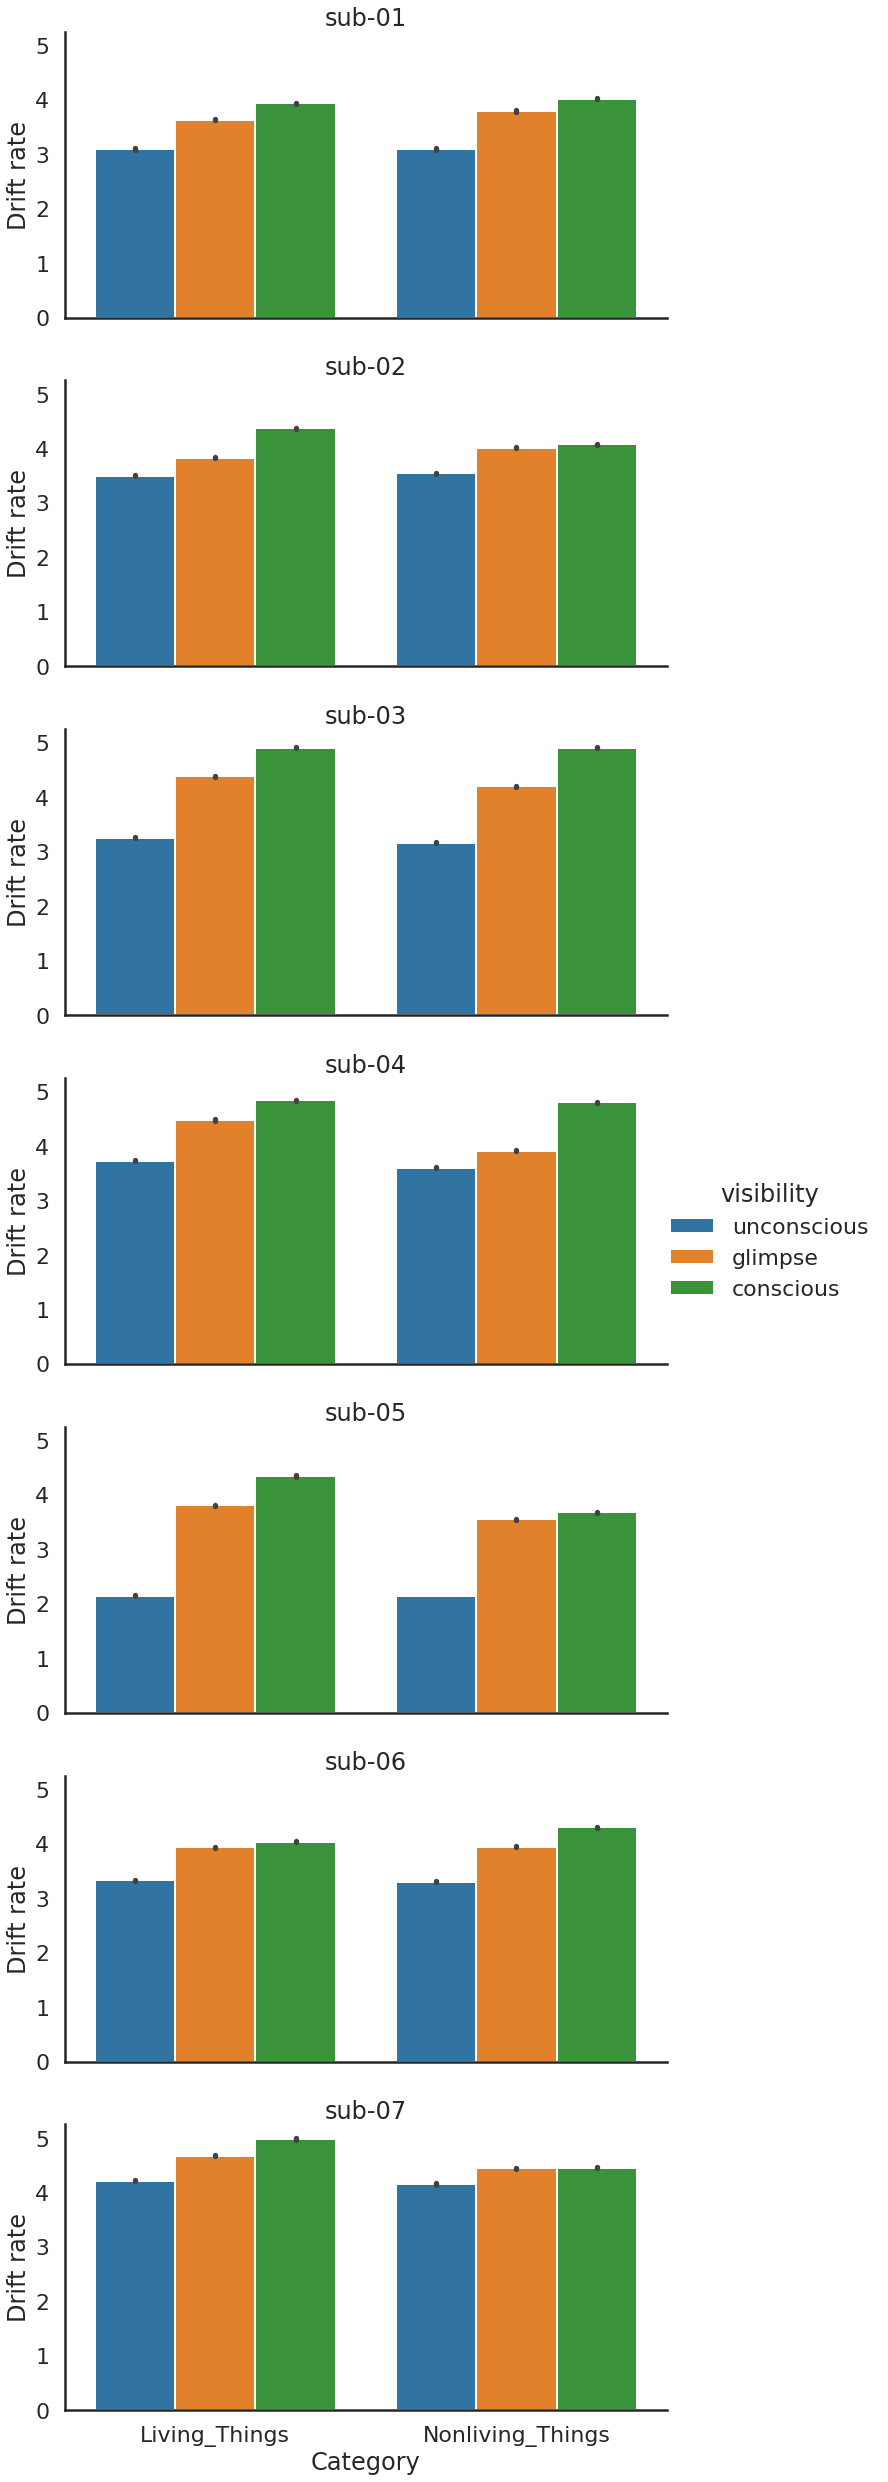

In [ ]:
g = sns.catplot(x = 'category',
                y = 'value',
                hue = 'visibility',
                hue_order = ['unconscious','glimpse','conscious'],
                row = 'sub',
                data = df_plot,
                kind = 'bar',
                aspect = 2,
                )
(g.set(xlabel = 'Category',ylabel = 'Drift rate')
  .set_titles("{row_name}"))

## threshold as a function of category and visibility

In [ ]:
df_plot = generate_df_plot(trace,formula = "target~category*visibility",target = 'a')

[Text(0, 0.5, 'How discriminative the choices'), Text(0.5, 0, 'category')]

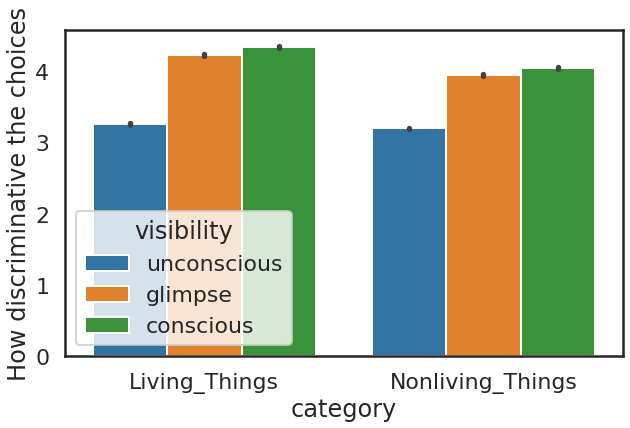

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(x = 'category',
                 y = 'value',
                 hue = 'visibility',
                 hue_order = ['unconscious','glimpse','conscious'],
                 data = df_plot,
                 ax = ax,
                 )
ax.set(xlabel = 'category',ylabel = 'How discriminative the choices')

## threhsold as a function of category, visibility and subjects

In [ ]:
df_plot = generate_df_plot(trace,formula = "target~category*visibility*sub",target = 'a')

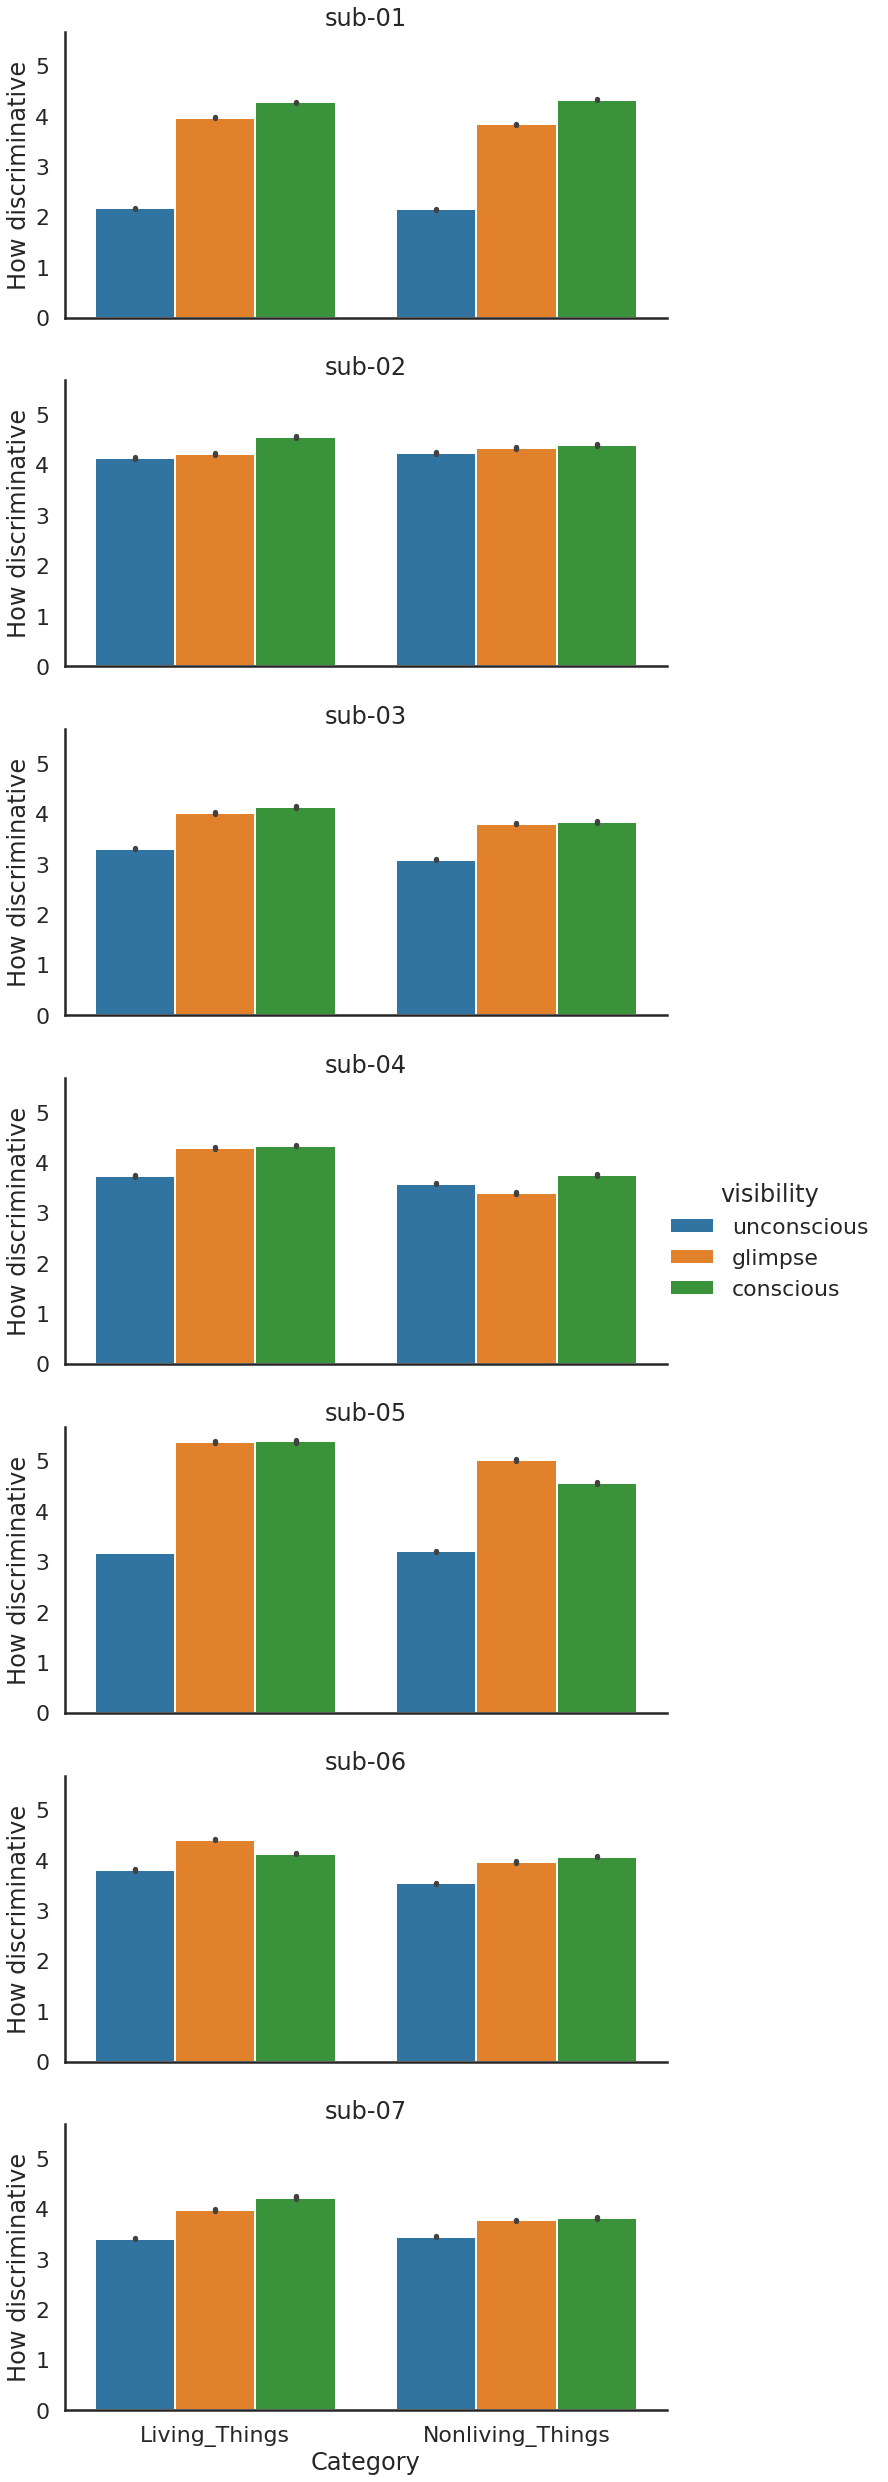

In [ ]:
g = sns.catplot(x = 'category',
                y = 'value',
                hue = 'visibility',
                hue_order = ['unconscious','glimpse','conscious'],
                row = 'sub',
                data = df_plot,
                kind = 'bar',
                aspect = 2,
                )
(g.set(xlabel = 'Category',ylabel = 'How discriminative')
  .set_titles("{row_name}"))

# model visibility RT as a function of the other parameters

In [ ]:
data = df.copy()
data = data.dropna()
data['rt'] = data['visible.rt_raw'].values.copy()
data['response'] = np.array(data['visible.keys_raw'].values.copy() == 1,dtype = int) + 1 # 1:unconsicous,2:glimpse + conscious
data['subj_idx'] = data['sub'].values.copy()
data.columns

Index(['sub', 'category', 'subcategory', 'label', 'correctAns_raw',
       'response.corr_raw', 'response.keys_raw', 'response.rt_raw',
       'visible.keys_raw', 'visible.rt_raw', 'probe_Frames_raw', 'rt',
       'response', 'subj_idx'],
      dtype='object')

In [ ]:
############################################
# Instantiate model object passing it our data (no need to call flip_errors() before passing it).
# This will tailor an individual hierarchical DDM around your dataset.
m_vis = hddm.HDDM(data, 
              depends_on = {'v':['category','visible.keys_raw'],
                            'a':['category','visible.keys_raw']},
              is_group_model = True,
              bias = True, # include the bias term, so we will have {a,v,t,b} parameters
              )
# find a good starting point which helps with the convergence.
m_vis.find_starting_values()
# start drawing 2000 samples and discarding 500 as burn-in
m_vis.sample(2000, burn=500)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2001 of 2000 complete in 928.6 sec

In [ ]:
stats = m_vis.gen_stats()
traces = m_vis.get_traces()

## drift rate as a function of different categories and visibility

[Text(0, 0.5, 'Drift rate'), Text(0.5, 0, 'Category')]

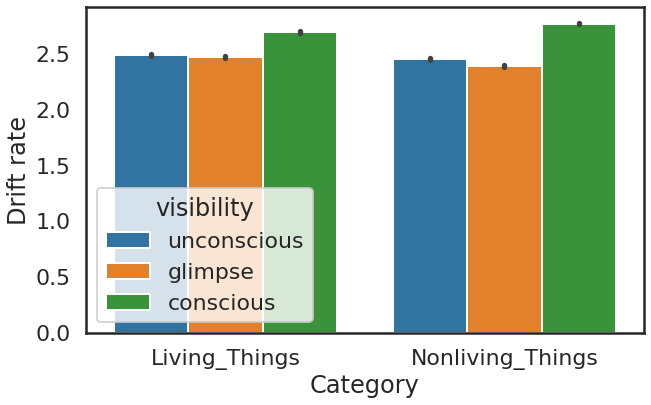

In [ ]:
df_plot = generate_df_plot(traces,formula = "target~category*visibility",target = 'v')
fig,ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(x = 'category',
                 y = 'value',
                 hue = 'visibility',
                 hue_order = ['unconscious','glimpse','conscious'],
                 data = df_plot,
                 ax = ax,
                 )
ax.set(xlabel = 'Category',ylabel = 'Drift rate')

## drift rate as a function of different categories, visibility and subjects

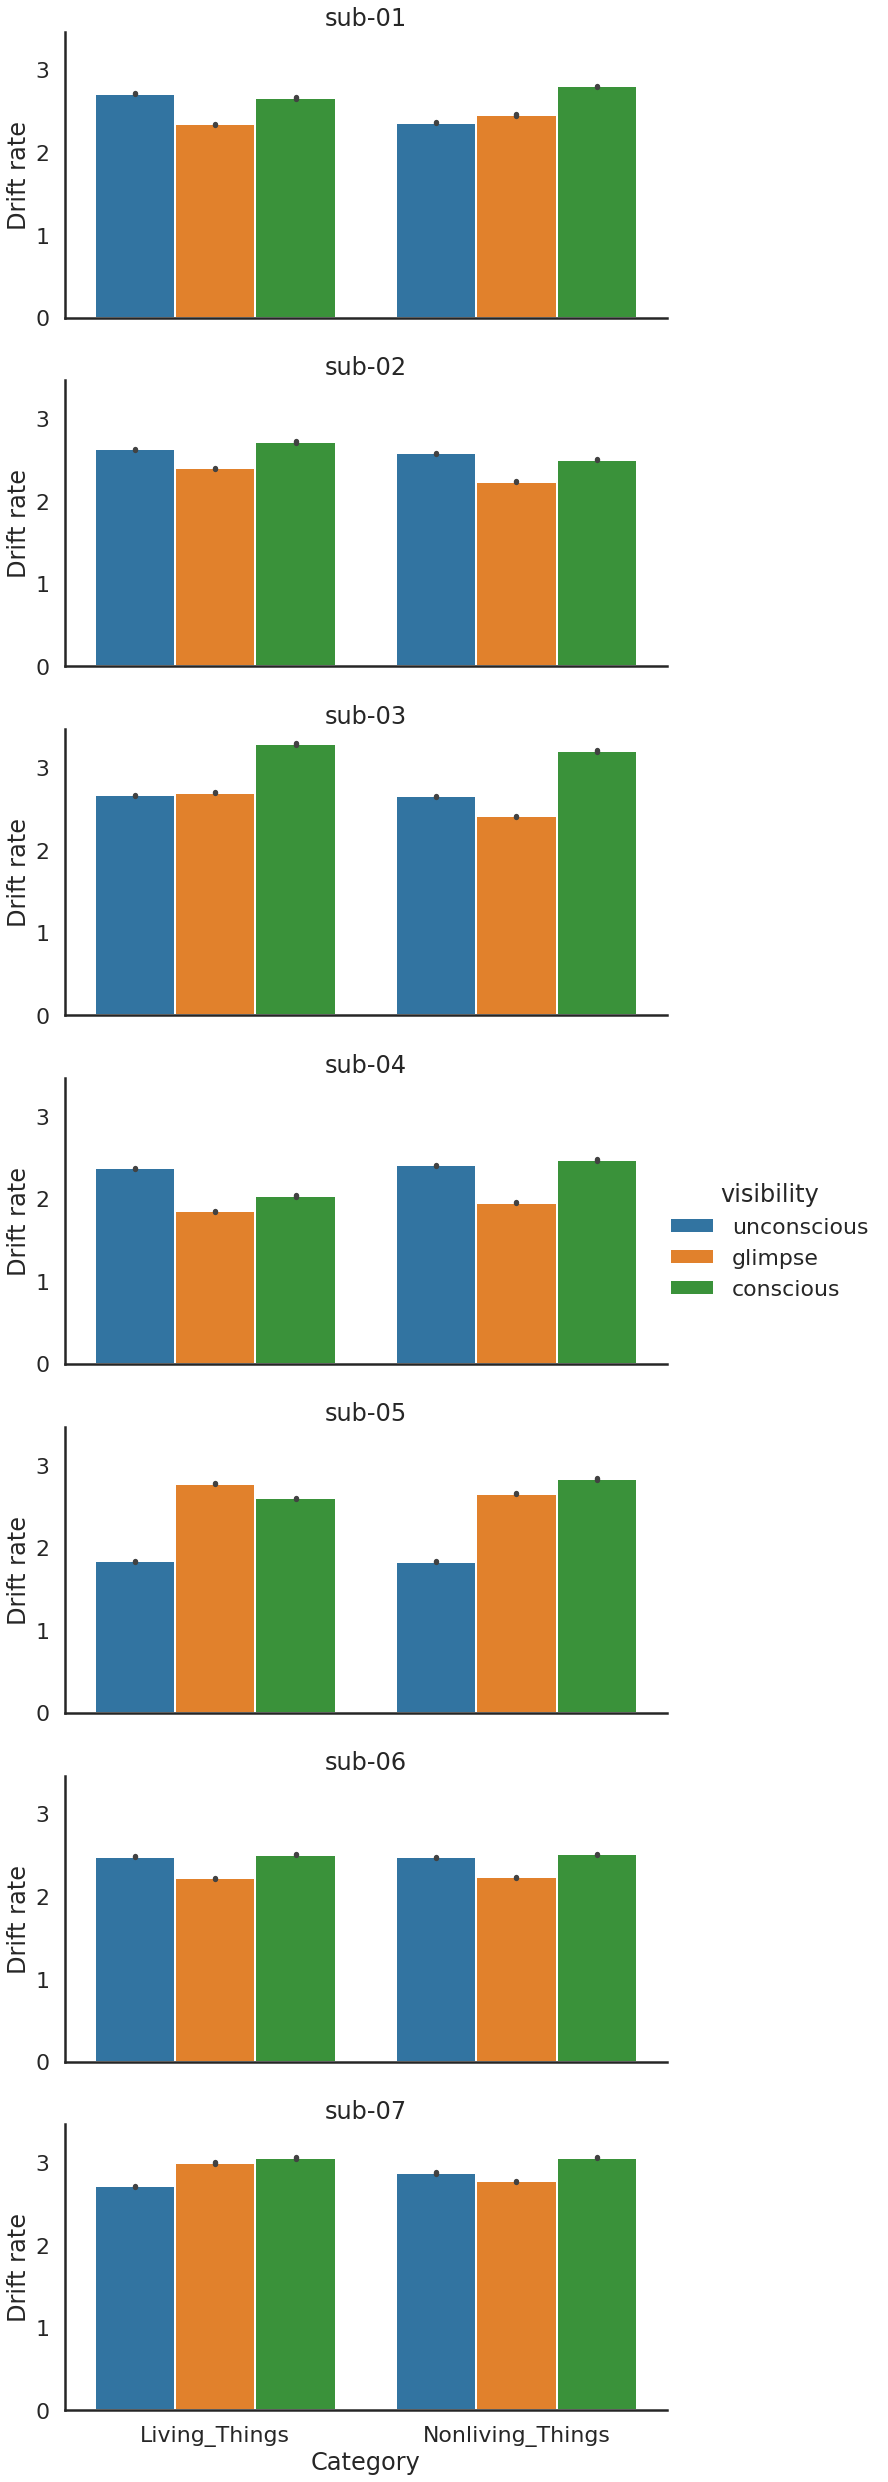

In [ ]:
df_plot = generate_df_plot(traces,formula = "target~category*visibility*sub",target = 'v')
g = sns.catplot(x = 'category',
                y = 'value',
                hue = 'visibility',
                hue_order = ['unconscious','glimpse','conscious'],
                row = 'sub',
                data = df_plot,
                kind = 'bar',
                aspect = 2,
                )
(g.set(xlabel = 'Category',ylabel = 'Drift rate')
  .set_titles("{row_name}"))

## threshold as a function of catgory and visibility

[Text(0, 0.5, 'Unconscious vs conscious'), Text(0.5, 0, 'category')]

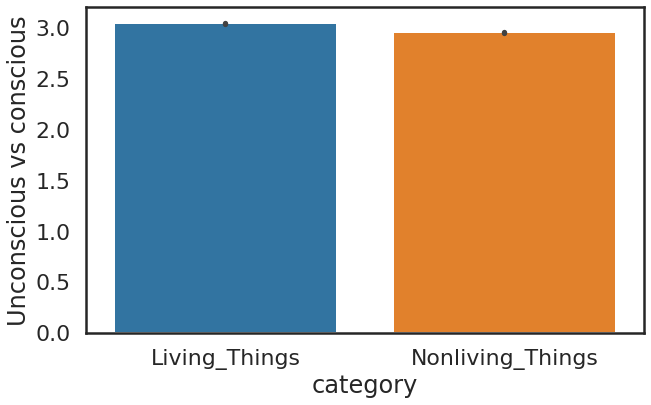

In [ ]:
df_plot = generate_df_plot(traces,formula = "target~category*visibility",target = 'a')
fig,ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(x = 'category',
                 y = 'value',
                 #hue = 'visibility',
                 #hue_order = ['unconscious','glimpse','conscious'],
                 data = df_plot,
                 ax = ax,
                 )
ax.set(xlabel = 'category',ylabel = 'Unconscious vs conscious')

## threshold as a function of category, visibility and subjects

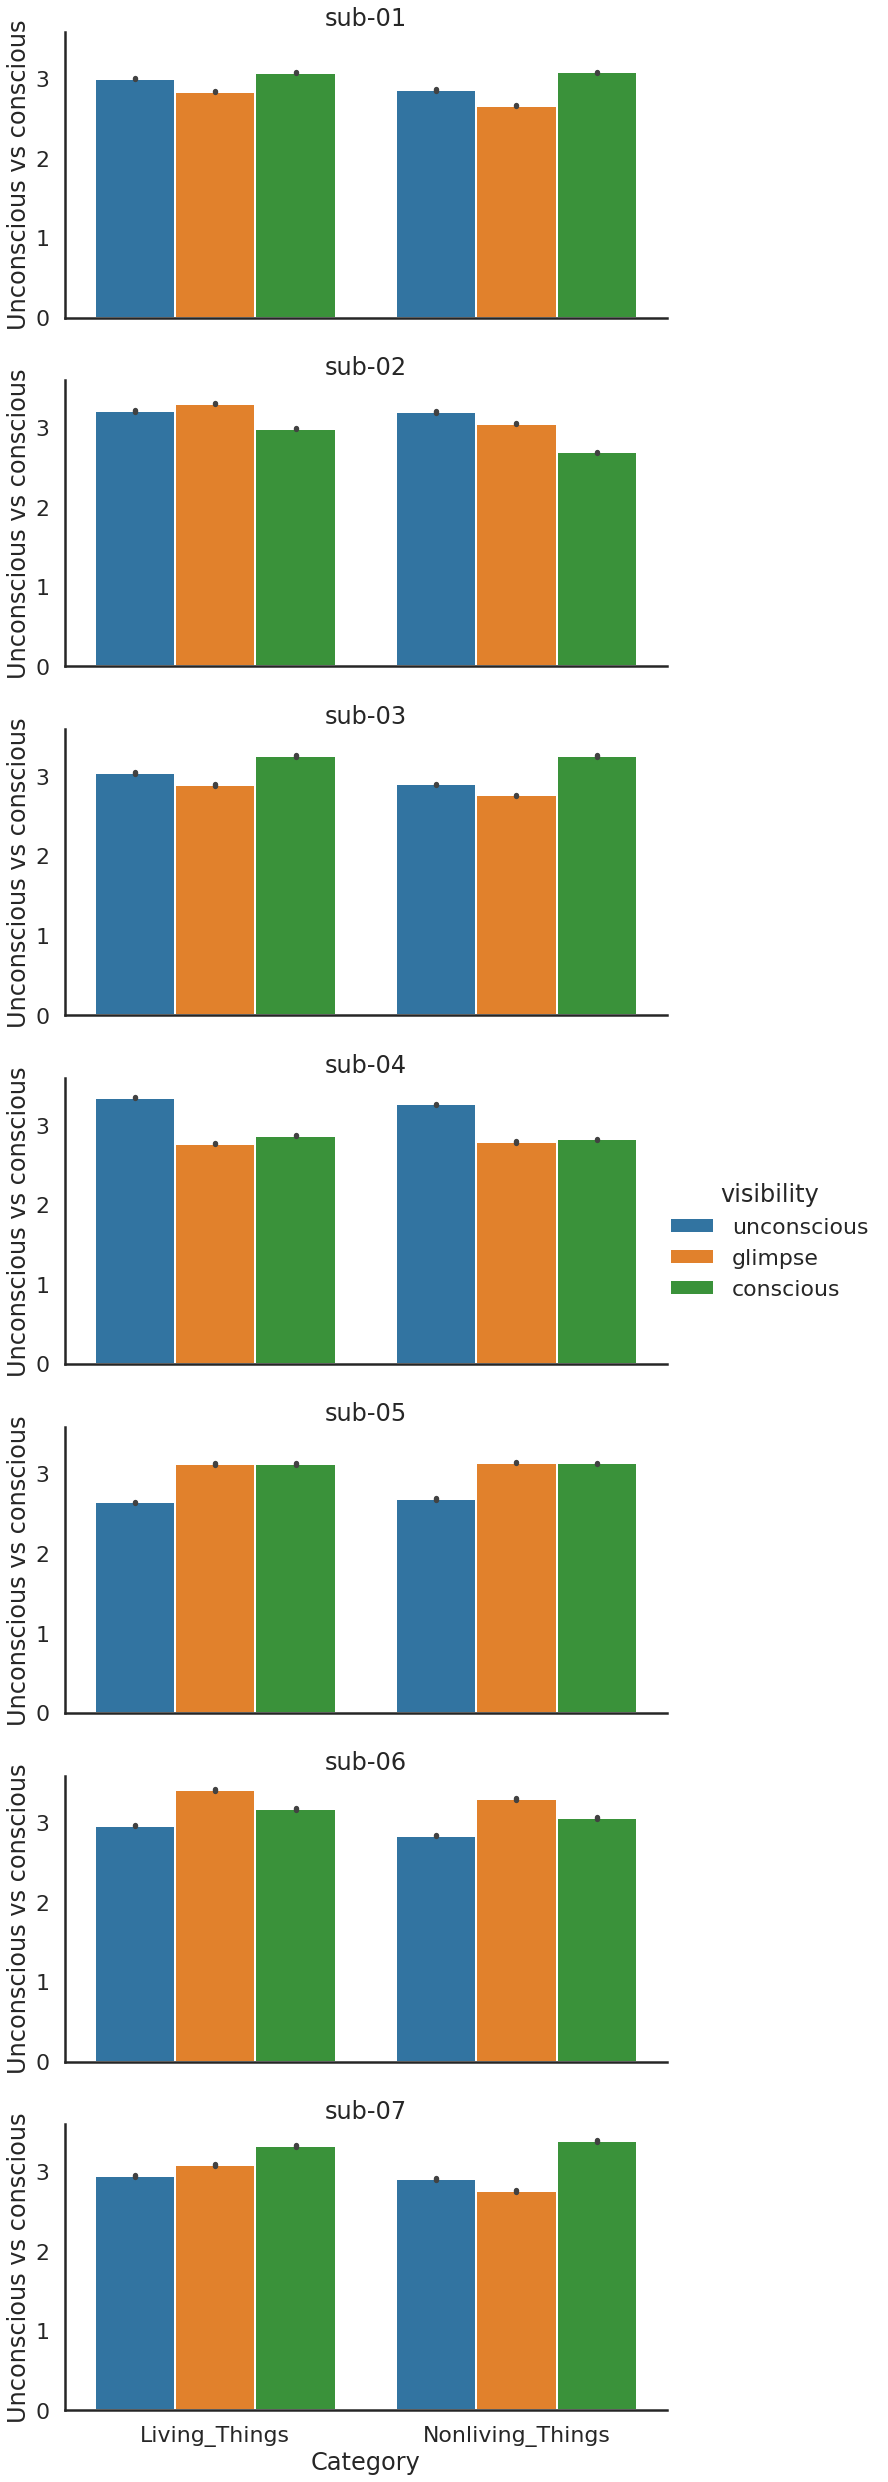

In [ ]:
df_plot = generate_df_plot(traces,formula = "target~category*visibility*sub",target = 'a')
g = sns.catplot(x = 'category',
                y = 'value',
                hue = 'visibility',
                hue_order = ['unconscious','glimpse','conscious'],
                row = 'sub',
                data = df_plot,
                kind = 'bar',
                aspect = 2,
                )
(g.set(xlabel = 'Category',ylabel = 'Unconscious vs conscious')
  .set_titles("{row_name}"))